In [2]:
import requests as rq
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [10]:
urls = ['https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=per_game&per_minute_base=36&per_poss_base=100&lg_id=NBA&is_playoffs=N&year_min=2020&year_max=2020&franch_id=&season_start=1&season_end=-1&age_min=0&age_max=99&shoot_hand=&height_min=0&height_max=99&birth_country_is=Y&birth_country=&birth_state=&college_id=&draft_year=&is_active=&debut_yr_nba_start=&debut_yr_nba_end=&is_hof=&is_as=&as_comp=gt&as_val=0&award=&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&qual=&c1stat=g&c1comp=gt&c1val=25&c2stat=mp_per_g&c2comp=gt&c2val=12&c3stat=def_rtg&c3comp=gt&c3val=&c4stat=usg_pct&c4comp=gt&c4val=&c5stat=def_rtg&c5comp=gt&c6mult=&c6stat=&order_by=dws&order_by_asc=&offset=0', 
        'https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=per_game&per_minute_base=36&per_poss_base=100&lg_id=NBA&is_playoffs=N&year_min=2020&year_max=2020&franch_id=&season_start=1&season_end=-1&age_min=0&age_max=99&shoot_hand=&height_min=0&height_max=99&birth_country_is=Y&birth_country=&birth_state=&college_id=&draft_year=&is_active=&debut_yr_nba_start=&debut_yr_nba_end=&is_hof=&is_as=&as_comp=gt&as_val=0&award=&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&qual=&c1stat=g&c1comp=gt&c1val=25&c2stat=mp_per_g&c2comp=gt&c2val=12&c3stat=def_rtg&c3comp=gt&c3val=&c4stat=usg_pct&c4comp=gt&c4val=&c5stat=def_rtg&c5comp=gt&c6mult=&c6stat=&order_by=dws&order_by_asc=&offset=100', 
        'https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=per_game&per_minute_base=36&per_poss_base=100&lg_id=NBA&is_playoffs=N&year_min=2020&year_max=2020&franch_id=&season_start=1&season_end=-1&age_min=0&age_max=99&shoot_hand=&height_min=0&height_max=99&birth_country_is=Y&birth_country=&birth_state=&college_id=&draft_year=&is_active=&debut_yr_nba_start=&debut_yr_nba_end=&is_hof=&is_as=&as_comp=gt&as_val=0&award=&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&qual=&c1stat=g&c1comp=gt&c1val=25&c2stat=mp_per_g&c2comp=gt&c2val=12&c3stat=def_rtg&c3comp=gt&c3val=&c4stat=usg_pct&c4comp=gt&c4val=&c5stat=def_rtg&c5comp=gt&c6mult=&c6stat=&order_by=dws&order_by_asc=&offset=200',
        'https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=per_game&per_minute_base=36&per_poss_base=100&lg_id=NBA&is_playoffs=N&year_min=2020&year_max=2020&franch_id=&season_start=1&season_end=-1&age_min=0&age_max=99&shoot_hand=&height_min=0&height_max=99&birth_country_is=Y&birth_country=&birth_state=&college_id=&draft_year=&is_active=&debut_yr_nba_start=&debut_yr_nba_end=&is_hof=&is_as=&as_comp=gt&as_val=0&award=&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&qual=&c1stat=g&c1comp=gt&c1val=25&c2stat=mp_per_g&c2comp=gt&c2val=12&c3stat=def_rtg&c3comp=gt&c3val=&c4stat=usg_pct&c4comp=gt&c4val=&c5stat=def_rtg&c5comp=gt&c6mult=&c6stat=&order_by=dws&order_by_asc=&offset=300']

all_stats_byrow = []
player_names_list = []
temp = []
    
for url in urls:
    r_bbref_3d = rq.get(url)
    stats_bbref_soup = BeautifulSoup(r_bbref_3d.text, 'lxml')
    
    look_for_headers = stats_bbref_soup.table.thead.find_all('tr')
    look_for_headers[:1]
    headers_list = look_for_headers[1].text
    headers_list = headers_list.split('\n')
    headers_list = headers_list[2:-1]
        
    every_row = stats_bbref_soup.table.tbody.find_all('tr')  
    for row in every_row:
        list_of_stats = row.find_all('td')
        for td in list_of_stats:
            stat = td.text
            temp.append(stat)
        all_stats_byrow.append(temp)
        temp = []
        
allstats_df = pd.DataFrame(data=all_stats_byrow, columns=headers_list)
allstats_df = allstats_df.dropna().set_index('Player')
allstats_df.replace('','0', inplace=True)
allstats_df['G'] = allstats_df['G'].astype(int)
list_of_columns_ToBeFloats = allstats_df.columns[5:]
for col in list_of_columns_ToBeFloats:
    allstats_df[col] = allstats_df[col].astype(float)

allstats_df 

,Season,Age,Tm,Lg,G,MP,DRtg,USG%,DWS,GS,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
Player,,,,,,,,,,,,,,,,,,,,,
Giannis Antetokounmpo,2019-20,25,MIL,NBA,57,30.9,96.0,37.4,4.8,57.0,...,1.0,3.7,3.0,29.6,0.547,0.622,0.306,0.583,0.633,0.608
Anthony Davis,2019-20,26,LAL,NBA,54,34.3,101.0,29.8,4.0,54.0,...,2.5,2.5,2.5,26.7,0.512,0.555,0.328,0.543,0.845,0.614
Rudy Gobert,2019-20,27,UTA,NBA,61,34.6,103.0,16.2,4.0,61.0,...,2.0,2.0,3.1,15.2,0.701,0.701,0.000,0.701,0.620,0.702
Brook Lopez,2019-20,31,MIL,NBA,61,26.6,99.0,17.5,3.8,60.0,...,2.4,1.0,2.4,11.0,0.427,0.557,0.296,0.501,0.810,0.537
Bam Adebayo,2019-20,22,MIA,NBA,64,34.4,105.0,20.7,3.6,64.0,...,1.3,2.8,2.5,16.1,0.565,0.575,0.077,0.566,0.691,0.604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marco Belinelli,2019-20,33,SAS,NBA,51,14.8,118.0,17.0,0.1,0.0,...,0.0,0.3,0.8,5.6,0.380,0.412,0.356,0.481,0.780,0.507
Allen Crabbe,2019-20,27,TOT,NBA,37,17.6,117.0,12.7,0.1,1.0,...,0.1,0.5,1.3,4.6,0.356,0.466,0.303,0.458,0.714,0.470
Matthew Dellavedova,2019-20,29,CLE,NBA,56,14.1,119.0,13.3,0.1,3.0,...,0.0,1.0,1.4,3.0,0.343,0.482,0.213,0.398,0.865,0.449


In [4]:
# list_of_columns = allstats_df.columns[5:]
# print(list_of_columns)
# for col in list_of_columns:
#     allstats_df[col] = allstats_df[col].astype(float)
    

Index(['MP', 'DRtg', 'USG%', 'DWS', 'GS', 'FG', 'FGA', '2P', '2PA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%'],
      dtype='object')


In [4]:
allstats_df.to_csv('bbref_3&d&usg.csv')

In [16]:
league_averages = {}
for col in list_of_columns_ToBeFloats:
    averages[col] = allstats_df[col].mean()
print(league_averages)

{'MP': 24.28545994065283, 'DRtg': 110.66172106824926, 'USG%': 19.15044510385756, 'DWS': 1.2946587537091983, 'GS': 27.643916913946587, 'FG': 4.1394658753709255, 'FGA': 8.98278931750742, '2P': 2.9121661721068257, '2PA': 5.566765578635019, '3P': 1.2228486646884271, '3PA': 3.417210682492583, 'FT': 1.7925816023738876, 'FTA': 2.3219584569732934, 'ORB': 1.0142433234421362, 'DRB': 3.5130563798219603, 'TRB': 4.5252225519287865, 'AST': 2.4664688427299692, 'STL': 0.7715133531157272, 'BLK': 0.5014836795252219, 'TOV': 1.3970326409495553, 'PF': 2.0685459940652815, 'PTS': 11.28575667655786, 'FG%': 0.46064985163204714, '2P%': 0.520759643916914, '3P%': 0.3267952522255195, 'eFG%': 0.5289703264094956, 'FT%': 0.7597685459940658, 'TS%': 0.5600029673590505}


{'whiskers': [<matplotlib.lines.Line2D at 0x28c0ca81a08>,
 'caps': [<matplotlib.lines.Line2D at 0x28c0ca80588>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c0ca80ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x28c0ca88148>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c0ca882c8>],
 'means': []}

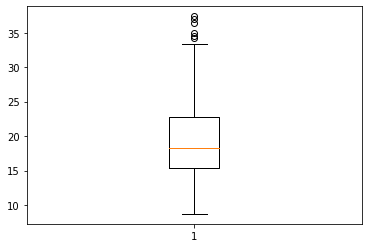

In [21]:
plt.boxplot(allstats_df['USG%'])
# np.percentile(allstats_df, 25)